In [13]:
# The code was removed by Watson Studio for sharing.

,Origin,Destination,DepYear,DepMonth,CargoCapacity
0,AAN,LHR,2,7,15280
1,ADD,NBO,1,1,238000
2,ADD,NBO,1,2,238000
3,ADD,NBO,1,3,238000
4,ADD,NBO,1,4,297500


In [14]:
g=df.groupby('Origin')
g  

In [29]:
# for Origin, Origin_df in g:
#     print(Origin)
#     print(Origin_df.head())

In [16]:
new_data=g.get_group('AUH')
new_data.head()

,Origin,Destination,DepYear,DepMonth,CargoCapacity
270,AUH,PVG,1,4,3327712
271,AUH,PVG,1,12,3246689
272,AUH,PVG,1,5,3241094
273,AUH,PVG,1,8,3199627
274,AUH,PVG,1,3,3129055


     DepMonth
270         4
271        12
272         5
273         8
274         3
-------------------------
270    3327712
271    3246689
272    3241094
273    3199627
274    3129055
Name: CargoCapacity, dtype: int64
(1592, 1)
(1592,)
(531, 1)
(531,)
430239.700336
[ 8199.81777802]
501818.570739


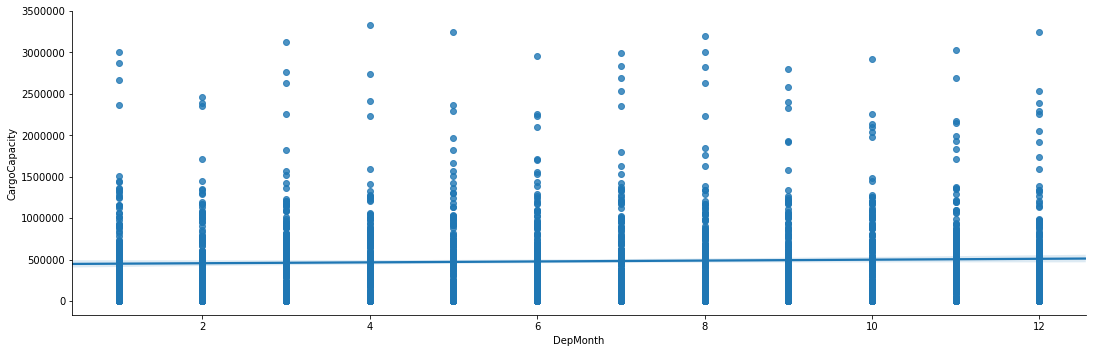

In [17]:
# df['Destination'][df['Origin']=='AUH']


# Regression specifically for AUH origin

import seaborn as sns
import numpy as np

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship bbetween the features and the response using scatterplots
sns.pairplot(new_data, x_vars=['DepMonth'], y_vars='CargoCapacity', size=5, aspect=3, kind='reg')


# feature names
feature_names = ['DepMonth']

# matrix training instances
X = new_data[feature_names]

# target output
label = 'CargoCapacity'
y = new_data[label]

print(X.head())
print('-------------------------')
print(y.head())

# How many training examples do we got?
# (row, col) -> (number of training examples, number of variables/features)
# print(X.shape)

# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

# As we are spliting data randomly,
# We use random_state=1 for reproducibility of this kernel results on your machine
# otherwise you would get differnt coeficients
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Linear Regression Model

# import model
from sklearn.linear_model import LinearRegression

# import module to calculate model perfomance metrics
from sklearn import metrics

# instantiate
# throws warning
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_names, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# We want to compute the RMSQ using the true testing(y) and our predicted(Y)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [18]:
g2=new_data.groupby('DepYear')
g2

In [30]:
# for DepYear, DepYear_df in g2:
#     print(DepYear)
#     print(DepYear_df)

In [20]:
# make month 1~24 if time allows. cuz it seems periodic

In [21]:
# Now I want to get only year 2
yr1_df=g2.get_group(2)
yr1_df.head()

,Origin,Destination,DepYear,DepMonth,CargoCapacity
277,AUH,BKK,2,8,3006573
281,AUH,BKK,2,1,2876961
282,AUH,BKK,2,7,2829685
285,AUH,BKK,2,3,2761006
288,AUH,HKG,2,11,2690386


In [22]:
month_g=yr1_df.groupby("DepMonth")
# for DepMonth, DepMonth_df in month_g:
#     print(DepMonth)
#     print(DepMonth_df.head())

In [23]:
#plot for all region, but averaged
data_by_month={
    'DepMonth':[],
    'CargoCapacity':[]
}

# first part
data_by_month_df=pd.DataFrame(data_by_month)

for x in range (1,13):
#     second part
    month_x=month_g.get_group(x)
    month_x_df=pd.DataFrame(month_x)
    
    monthly_cap={
    'DepMonth':[x],
    'CargoCapacity':[month_x_df['CargoCapacity'].mean()]
    }
    monthly_cap_df=pd.DataFrame(monthly_cap)
#     add an average instead
    data_by_month_df=pd.concat([data_by_month_df,monthly_cap_df[['DepMonth','CargoCapacity']].head(1)])

# currently outputs 1st row of every month. I want an average though
print (data_by_month_df.set_index("DepMonth"))

print("check: Month 12 mean:",month_x_df['CargoCapacity'].mean())

          CargoCapacity
DepMonth               
1.0       439101.620690
2.0       399294.247191
3.0       460030.176471
4.0       460206.226190
5.0       484171.011905
6.0       463357.047619
7.0       485374.845238
8.0       510314.780488
9.0       473715.768293
10.0      488011.025316
11.0      507611.580247
12.0      494378.240964
check: Month 12 mean: 494378.2409638554


   DepMonth
0       1.0
0       2.0
0       3.0
0       4.0
0       5.0
-------------------------
0    439101.620690
0    399294.247191
0    460030.176471
0    460206.226190
0    484171.011905
Name: CargoCapacity, dtype: float64
(9, 1)
(9,)
(3, 1)
(3,)
415978.1182
[ 7838.72867042]
21820.4619296
Learned  linear functin is: y=  415978 + 7838 * DepMonth


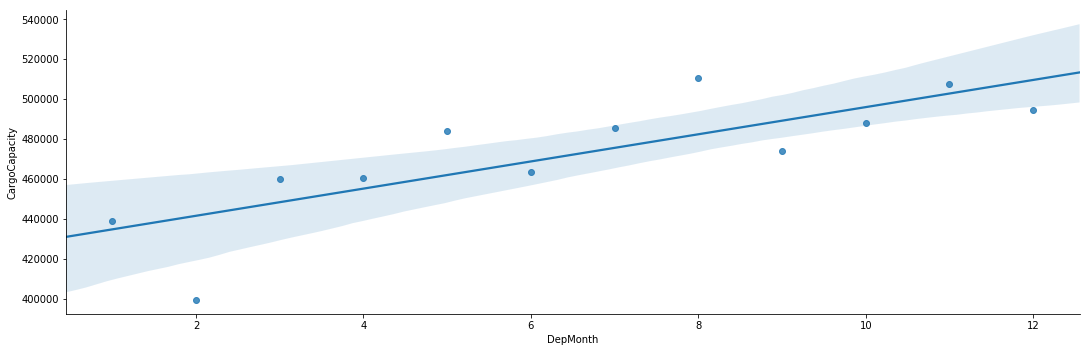

In [25]:
import seaborn as sns
import numpy as np

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship bbetween the features and the response using scatterplots
sns.pairplot(data_by_month_df, x_vars=['DepMonth'], y_vars='CargoCapacity', size=5, aspect=3, kind='reg')

# feature names
feature_names = ['DepMonth']

# matrix training instances
X = data_by_month_df[feature_names]

# target output
label = 'CargoCapacity'
y = data_by_month_df[label]

print(X.head())
print('-------------------------')
print(y.head())

# How many training examples do we got?
# (row, col) -> (number of training examples, number of variables/features)
# print(X.shape)

# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

# As we are spliting data randomly,
# We use random_state=1 for reproducibility of this kernel results on your machine
# otherwise you would get differnt coeficients
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Linear Regression Model

# import model
from sklearn.linear_model import LinearRegression

# import module to calculate model perfomance metrics
from sklearn import metrics

# instantiate
# throws warning
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_names, linreg.coef_))

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# We want to compute the RMSQ using the true testing(y) and our predicted(Y)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Learned  linear functin is: y= ',int(linreg.intercept_),"+",int(linreg.coef_),"* DepMonth")

In [26]:

print("Insight:")
print("Cargocapacity forecast for 2019:")
for x in range (1,13):
    print(" Month ",x,":", int(linreg.intercept_+ x* float(linreg.coef_)), "tons")

Insight:
Cargocapacity forecast for 2019:
 Month  1 : 423816 tons
 Month  2 : 431655 tons
 Month  3 : 439494 tons
 Month  4 : 447333 tons
 Month  5 : 455171 tons
 Month  6 : 463010 tons
 Month  7 : 470849 tons
 Month  8 : 478687 tons
 Month  9 : 486526 tons
 Month  10 : 494365 tons
 Month  11 : 502204 tons
 Month  12 : 510042 tons
